In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests


In [ ]:

# Load Natural Earth shapefile (countries)
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")


DriverError: Failed to open dataset (flags=68): data/ca_state_boundary','tl_2022_us_state','tl_2022_us_state.shp

In [5]:

# Fetch earthquake data from USGS API
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "geojson",
    "starttime": "2014-01-01",
    "endtime": "2014-12-31",
    "minmagnitude": 6.5,
    "orderby": "time",
    "limit": 20000
}
response = requests.get(url, params=params)
data = response.json()


In [6]:

# Parse earthquake data
features = data["features"]
records = [{
    "longitude": f["geometry"]["coordinates"][0],
    "latitude": f["geometry"]["coordinates"][1],
    "magnitude": f["properties"]["mag"]
} for f in features]
df_eq = pd.DataFrame(records)

# Convert to GeoDataFrame
gdf_eq = gpd.GeoDataFrame(
    df_eq,
    geometry=gpd.points_from_xy(df_eq.longitude, df_eq.latitude),
    crs="EPSG:4326"
)


NameError: name 'world' is not defined

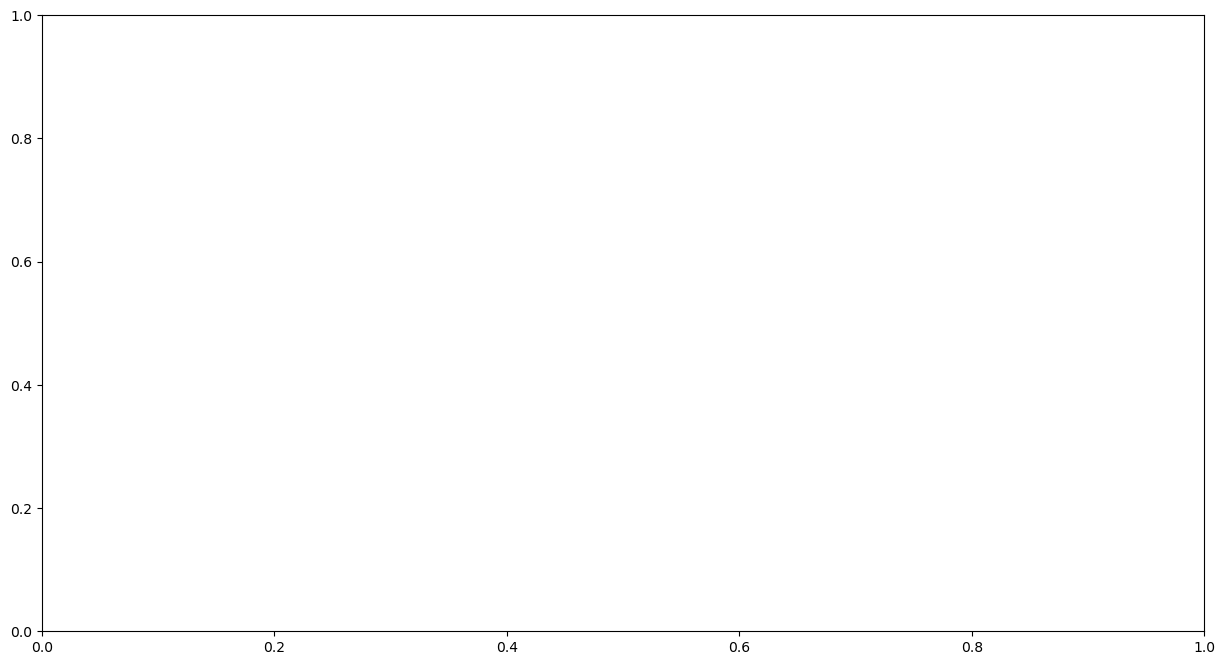

In [7]:

# Plot
fig, ax = plt.subplots(figsize=(15, 8))
world.plot(ax=ax, color="lightgray", edgecolor="white")
gdf_eq.plot(
    ax=ax, column="magnitude", cmap="Reds", markersize=30,
    legend=True, alpha=0.7
)

# Title and source
plt.title("Earthquakes of Magnitude ≥ 6.5 in 2014", fontsize=16)
plt.text(-180, -90, "Data: USGS Earthquakes Database", fontsize=10)
plt.axis("off")
plt.tight_layout()
plt.show()
